# Q2.6: Feature Normalization (Iris) - Min-Max Scaling

Demonstrate feature normalization using Min-Max scaling and visualize distributions before/after scaling.

**Exam outputs:** before/after plots (boxplot/histogram) and a brief observation.

## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

## Step 2: Load Iris Dataset

In [2]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

print(f"Original Data Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"\nFirst 5 samples:\n{X[:5]}")

Original Data Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### Display Original Statistics

In [3]:
df_original = pd.DataFrame(X, columns=feature_names)
print("\nOriginal Data Statistics:")
print(df_original.describe())


Original Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


## Step 3: Perform Min-Max Scaling

### Apply Normalization

In [4]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(f"Normalized Data Shape: {X_norm.shape}")
print(f"\nFirst 5 normalized samples:\n{X_norm[:5]}")

Normalized Data Shape: (150, 4)

First 5 normalized samples:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


### Display Normalized Statistics

In [5]:
df_normalized = pd.DataFrame(X_norm, columns=feature_names)
print("\nNormalized Data Statistics:")
print(df_normalized.describe())


Normalized Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


## Step 4: Visualize Original vs Normalized

### Boxplot Comparison

C:\Users\Akshat\AppData\Local\Temp\ipykernel_10312\2165130513.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([X[:, i] for i in range(4)], labels=[f.split(' (cm)')[0] for f in feature_names])
C:\Users\Akshat\AppData\Local\Temp\ipykernel_10312\2165130513.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([X_norm[:, i] for i in range(4)], labels=[f.split(' (cm)')[0] for f in feature_names])


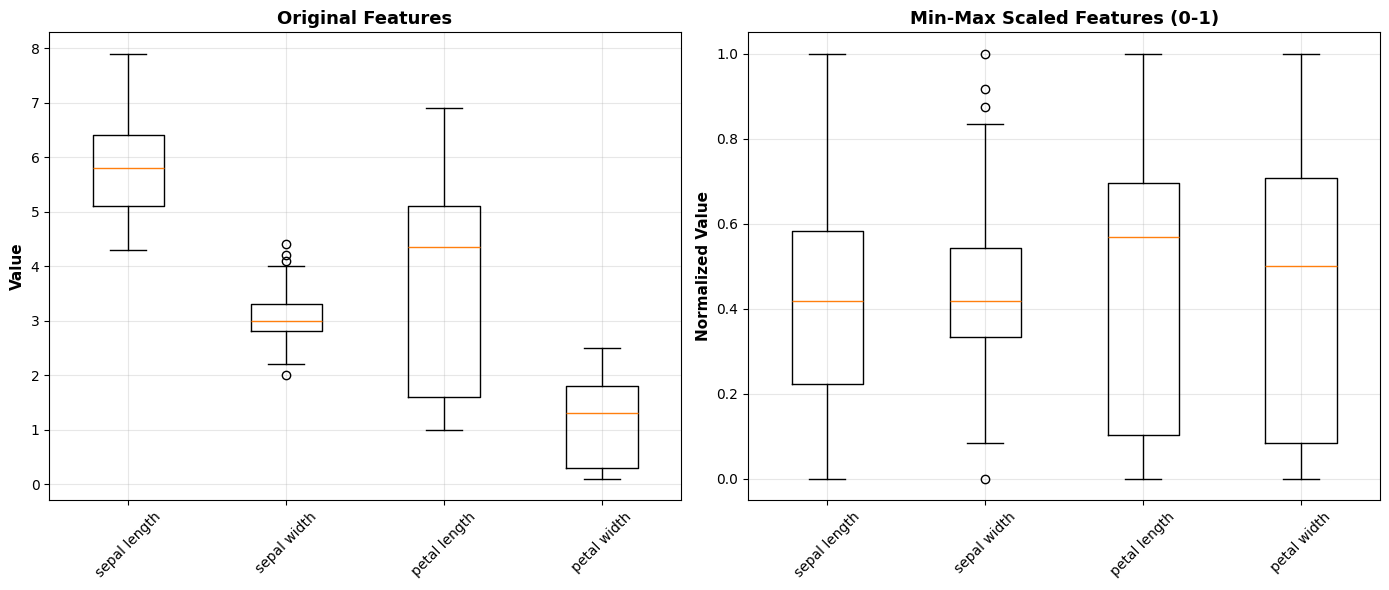

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original data
ax1.boxplot([X[:, i] for i in range(4)], labels=[f.split(' (cm)')[0] for f in feature_names])
ax1.set_ylabel('Value', fontsize=11, fontweight='bold')
ax1.set_title('Original Features', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Normalized data
ax2.boxplot([X_norm[:, i] for i in range(4)], labels=[f.split(' (cm)')[0] for f in feature_names])
ax2.set_ylabel('Normalized Value', fontsize=11, fontweight='bold')
ax2.set_title('Min-Max Scaled Features (0-1)', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Histogram Comparison

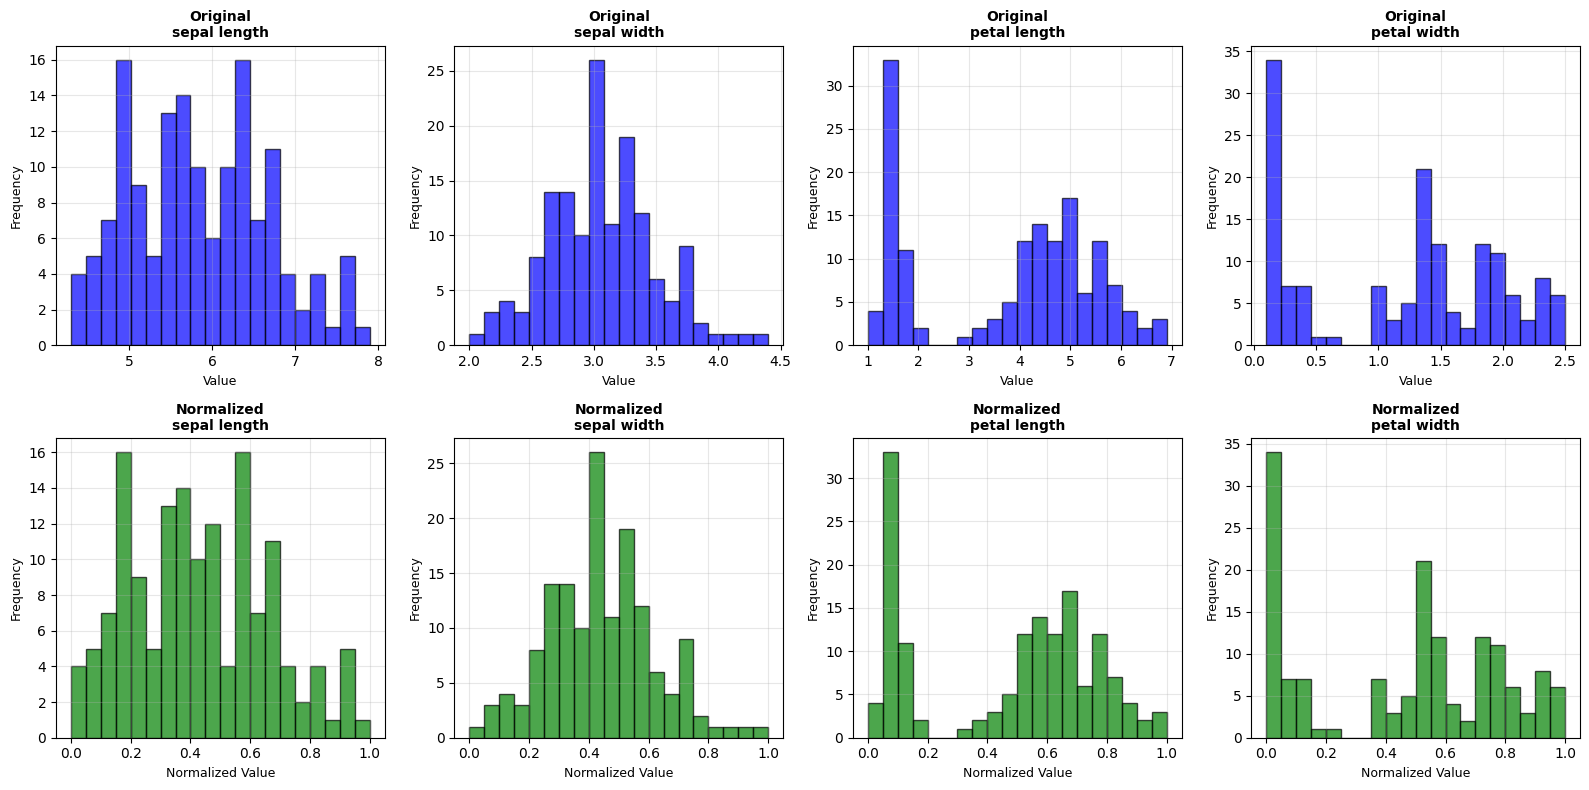

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(4):
    # Original
    axes[0, i].hist(X[:, i], bins=20, color='blue', alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Original\n{feature_names[i].split(" (cm)")[0]}', fontsize=10, fontweight='bold')
    axes[0, i].set_xlabel('Value', fontsize=9)
    axes[0, i].set_ylabel('Frequency', fontsize=9)
    axes[0, i].grid(alpha=0.3)
    
    # Normalized
    axes[1, i].hist(X_norm[:, i], bins=20, color='green', alpha=0.7, edgecolor='black')
    axes[1, i].set_title(f'Normalized\n{feature_names[i].split(" (cm)")[0]}', fontsize=10, fontweight='bold')
    axes[1, i].set_xlabel('Normalized Value', fontsize=9)
    axes[1, i].set_ylabel('Frequency', fontsize=9)
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Range Comparison

### Display Min and Max Values

In [8]:
print("\n" + "="*70)
print("FEATURE RANGE COMPARISON")
print("="*70)
print(f"{'Feature':<25} | {'Original Range':<20} | {'Normalized Range':<20}")
print("-"*70)

for i, name in enumerate(feature_names):
    orig_range = f"[{X[:, i].min():.2f}, {X[:, i].max():.2f}]"
    norm_range = f"[{X_norm[:, i].min():.2f}, {X_norm[:, i].max():.2f}]"
    print(f"{name:<25} | {orig_range:<20} | {norm_range:<20}")

print("="*70)


FEATURE RANGE COMPARISON
Feature                   | Original Range       | Normalized Range    
----------------------------------------------------------------------
sepal length (cm)         | [4.30, 7.90]         | [0.00, 1.00]        
sepal width (cm)          | [2.00, 4.40]         | [0.00, 1.00]        
petal length (cm)         | [1.00, 6.90]         | [0.00, 1.00]        
petal width (cm)          | [0.10, 2.50]         | [0.00, 1.00]        


## Step 6: Verify Min-Max Scaling Formula

### Manual Calculation Check

In [9]:
# Min-Max formula: X_scaled = (X - X_min) / (X_max - X_min)
print("Min-Max Scaling Formula Verification:")
print("X_scaled = (X - X_min) / (X_max - X_min)\n")

for i in range(4):
    X_min = X[:, i].min()
    X_max = X[:, i].max()
    manual_scaled = (X[0, i] - X_min) / (X_max - X_min)
    sklearn_scaled = X_norm[0, i]
    
    print(f"Feature: {feature_names[i]}")
    print(f"  Manual Calculation: {manual_scaled:.6f}")
    print(f"  sklearn Result:     {sklearn_scaled:.6f}")
    print(f"  Match: {np.isclose(manual_scaled, sklearn_scaled)}\n")

Min-Max Scaling Formula Verification:
X_scaled = (X - X_min) / (X_max - X_min)

Feature: sepal length (cm)
  Manual Calculation: 0.222222
  sklearn Result:     0.222222
  Match: True

Feature: sepal width (cm)
  Manual Calculation: 0.625000
  sklearn Result:     0.625000
  Match: True

Feature: petal length (cm)
  Manual Calculation: 0.067797
  sklearn Result:     0.067797
  Match: True

Feature: petal width (cm)
  Manual Calculation: 0.041667
  sklearn Result:     0.041667
  Match: True



## Summary

**Key Observations:**
- All features scaled to [0, 1] range
- Preserves relative relationships between data points
- Essential preprocessing for neural networks
- Ensures all features have equal importance initially